In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [ ]:
data = pd.read_csv('/content/marketing_campaign (1).csv', sep='\t')
data

In [ ]:
data.info()
data.dropna()


2015년 데이터 이므로 고객의 나이를 계산

In [5]:
data['Age'] = 2015 - data.Year_Birth


여러 제품에 대한 지출 데이터를 합산. 

In [6]:
data['TotalSpendings'] =  data.MntWines + data.MntFruits + data.MntMeatProducts + data.MntFishProducts + data.MntSweetProducts + data.MntGoldProds


어린이와 청소년 데이터를 합산.

In [7]:
data['Children'] = data['Kidhome'] + data['Teenhome']

결혼 상태 열에는 Together, Married, Divorced, Widow, Alone, Absurd, YOLO와 같은 값이 있습니다. 파트너와 싱글의 2가지 범주를 기반으로 고객의 결혼 여부를 표시해보고자 하였습니다.

In [8]:
data.Marital_Status = data.Marital_Status.replace({'Together': 'Partner',
                                                           'Married': 'Partner',
                                                           'Divorced': 'Single',
                                                           'Widow': 'Single', 
                                                           'Alone': 'Single',
                                                           'Absurd': 'Single',
                                                           'YOLO': 'Single'})

구성요소별 비율, 특징 알아보기

In [9]:
#Marital Status
import plotly.express as px

maritalstatus = data.Marital_Status.value_counts()

fig = px.pie(maritalstatus, 
             values = maritalstatus.values, 
             names = maritalstatus.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()



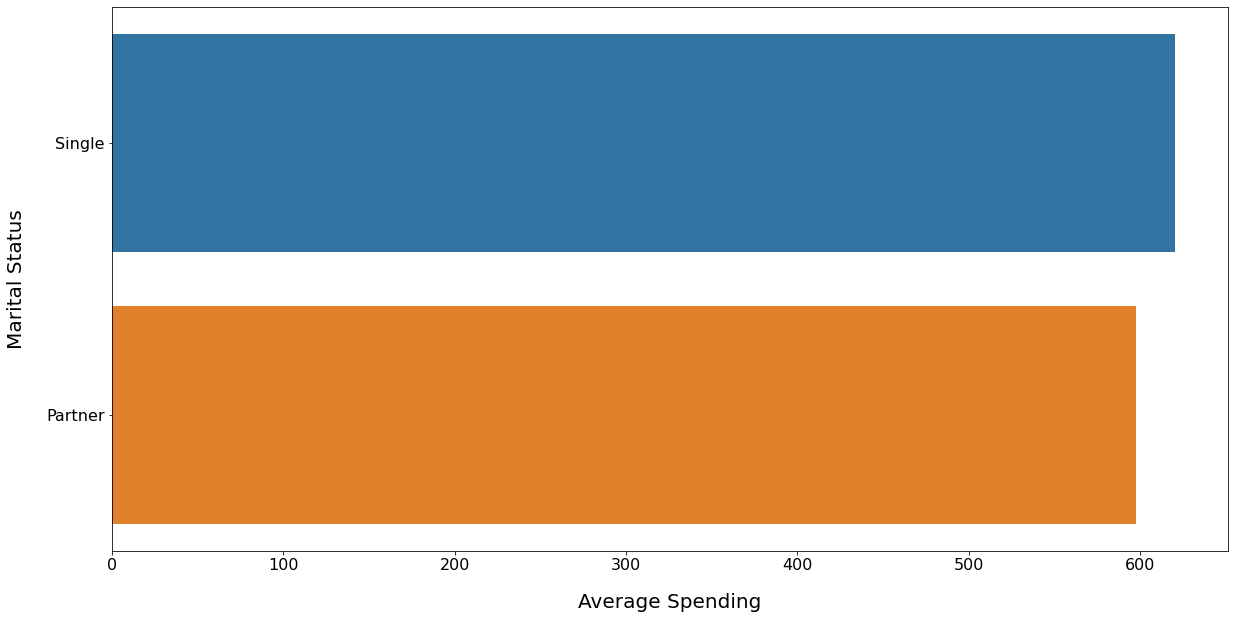

In [10]:
maritalspending = data.groupby('Marital_Status')['TotalSpendings'].mean().sort_values(ascending=False)
maritalspending_df = pd.DataFrame(list(maritalspending.items()), columns=['Marital Status', 'Average Spending'])

plt.figure(figsize=(20,10))
sns.barplot(data = maritalspending_df, x="Average Spending", y="Marital Status");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Average Spending', fontsize=20, labelpad=20)
plt.ylabel('Marital Status', fontsize=20, labelpad=20);

In [11]:
#Education Level
education = data.Education.value_counts()

fig = px.pie(education, 
             values = education.values, 
             names = education.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()


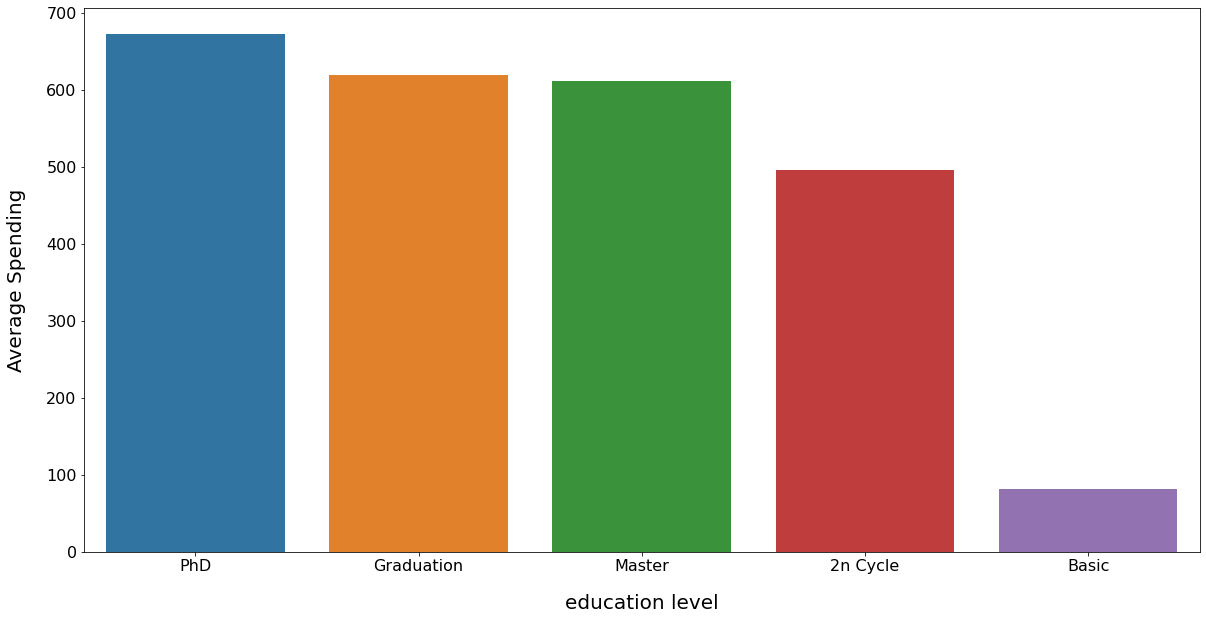

In [12]:
educationspending = data.groupby('Education')['TotalSpendings'].mean().sort_values(ascending=False)
educationspending_df = pd.DataFrame(list(educationspending.items()), columns=['education level', 'Average Spending'])

plt.figure(figsize=(20,10))

sns.barplot(data=educationspending_df,  x="education level", y="Average Spending");
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('education level', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

In [13]:
#Child Status
children = data.Children.value_counts()

fig = px.pie(children, 
             values = children.values, 
             names = children.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()



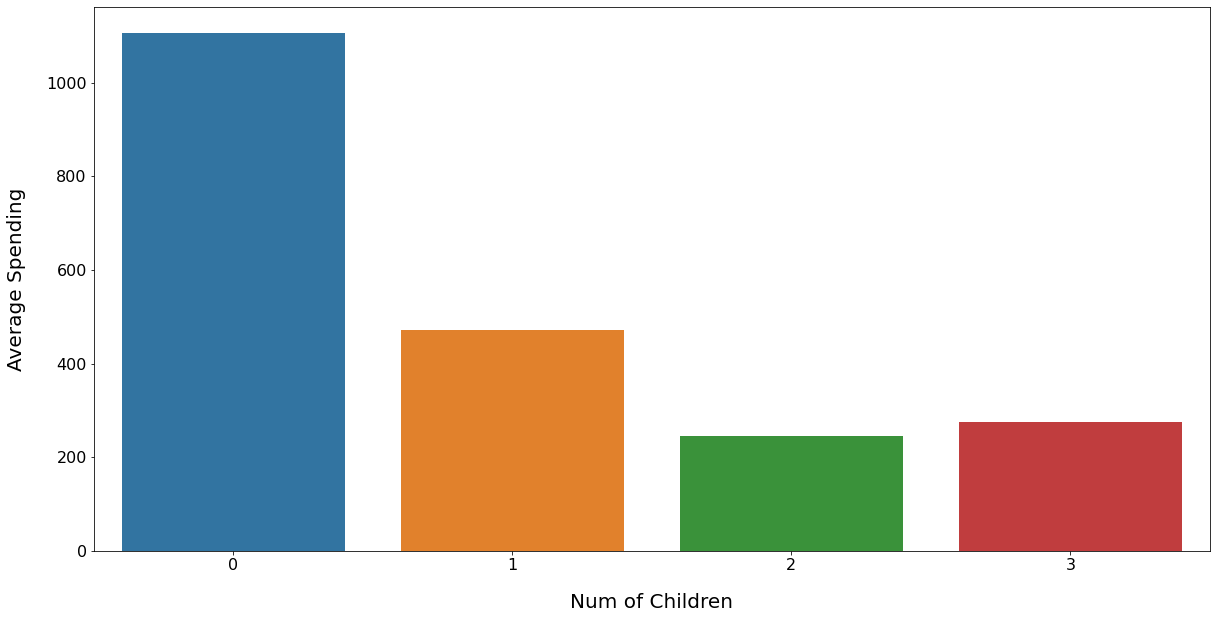

In [14]:
childrenspending = data.groupby('Children')['TotalSpendings'].mean().sort_values(ascending=False)
childrenspending_df = pd.DataFrame(list(childrenspending.items()), columns=['Num of Children', 'Average Spending'])

plt.figure(figsize=(20,10))

sns.barplot(data=childrenspending_df,  x="Num of Children", y="Average Spending");
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Num of Children', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

Text(0, 0.5, 'Counts')

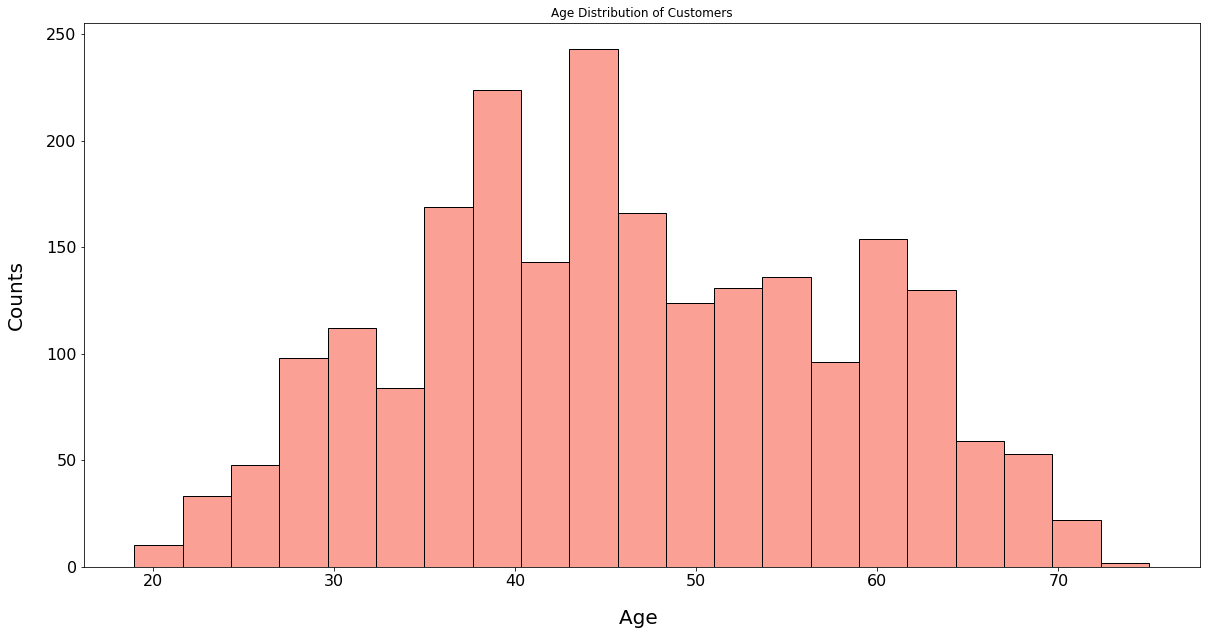

In [19]:
#age
data = data[data.Age < 100] #아웃라이어 제거

plt.figure(figsize=(20,10))
ax = sns.histplot(data = data.Age, color='salmon')
ax.set(title = "Age Distribution of Customers");
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age ', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20)


In [49]:
data.loc[(data['Age'] >= 13) & (data['Age'] <= 19), 'Agegroup'] = 'Teenager'
data.loc[(data['Age'] >= 20) & (data['Age']<= 39), 'Agegroup'] = 'Adult'
data.loc[(data['Age'] >= 40) & (data['Age'] <= 65), 'Agegroup'] = 'Middle Age'
data.loc[(data['Age'] > 65), 'Agegroup'] = 'Senior'

In [50]:
#agegroup
agegroup = data.Agegroup.value_counts()

fig = px.pie(agegroup, 
             values = agegroup.values, 
             names = agegroup.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

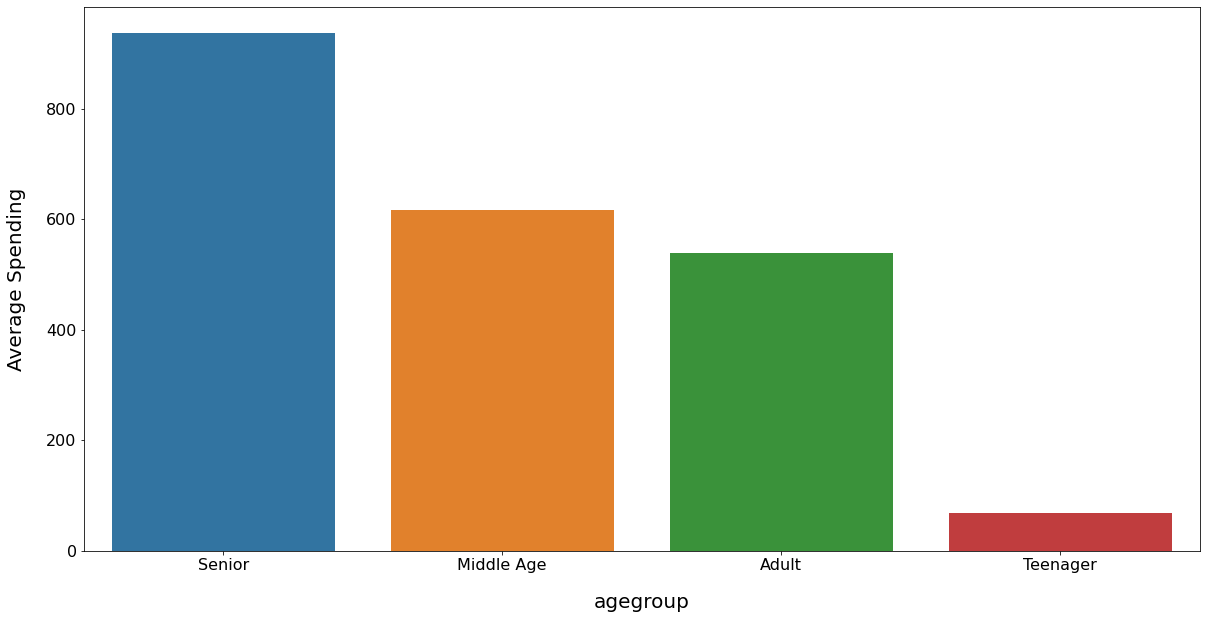

In [51]:
agegroupspending = data.groupby('Agegroup')['TotalSpendings'].mean().sort_values(ascending=False)
agegroupspending_df = pd.DataFrame(list(agegroupspending.items()), columns=['Agegroup', 'Average Spending'])

plt.figure(figsize=(20,10))

sns.barplot(data=agegroupspending_df,  x="Agegroup", y="Average Spending");
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('agegroup', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

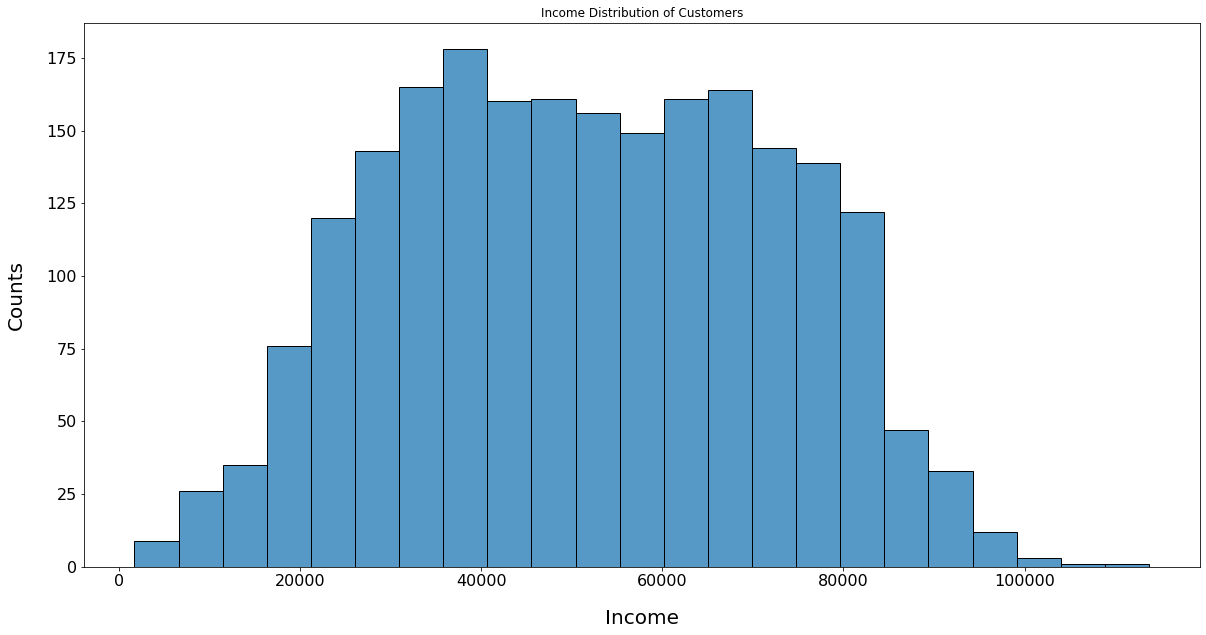

In [30]:
#income

#아웃라이어 제거
data = data[data.Income < 120000]

plt.figure(figsize=(20, 10))
ax = sns.histplot(data = data.Income)
ax.set(title = "Income Distribution of Customers");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20);

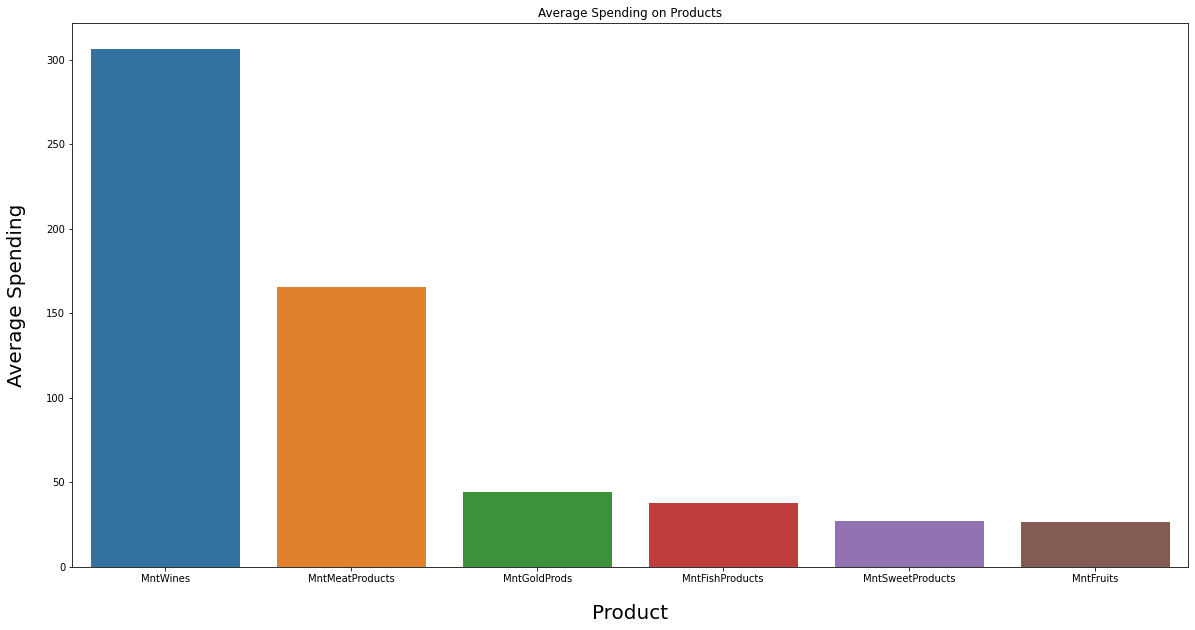

In [31]:
products = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
product_means = products.mean(axis=0).sort_values(ascending=False)
product_means_df = pd.DataFrame(list(product_means.items()), columns=['Product', 'Average Spending'])

plt.figure(figsize=(20,10))
plt.title('Average Spending on Products')
sns.barplot(data=product_means_df, x='Product', y='Average Spending');
plt.xlabel('Product', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

관계성 파악

In [ ]:
#아웃라이어 제거
data = data[data.Age < 100]

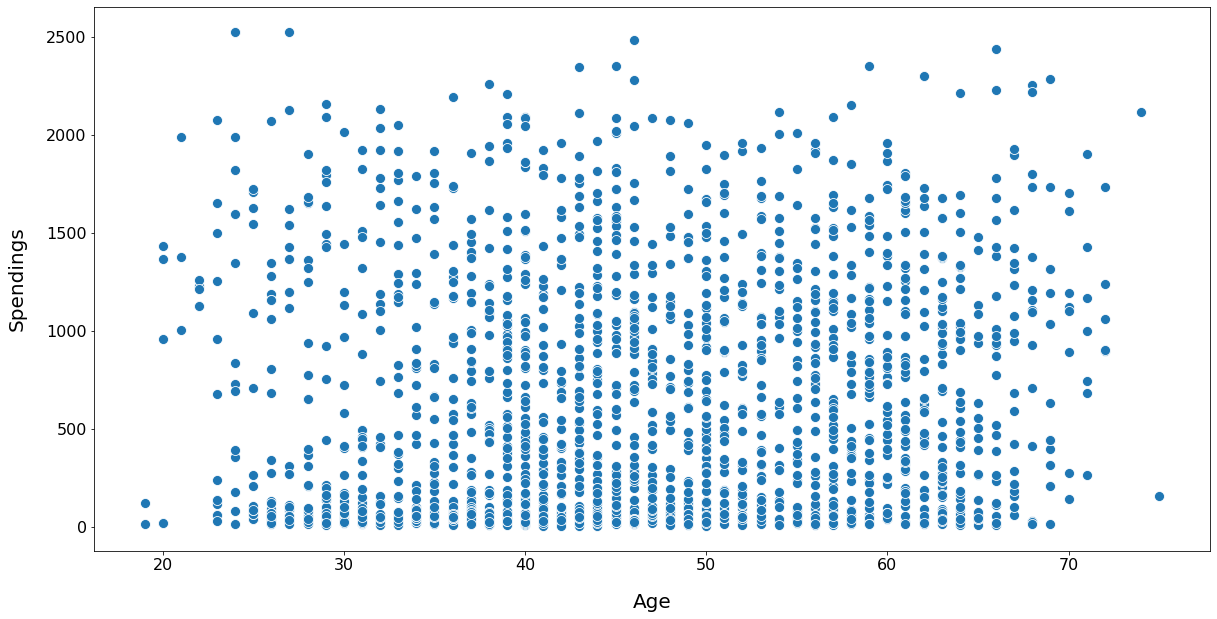

In [32]:
#Relationship: Age vs Spendings
plt.figure(figsize=(20,10))
sns.scatterplot(x=data.Age, y=data.TotalSpendings, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

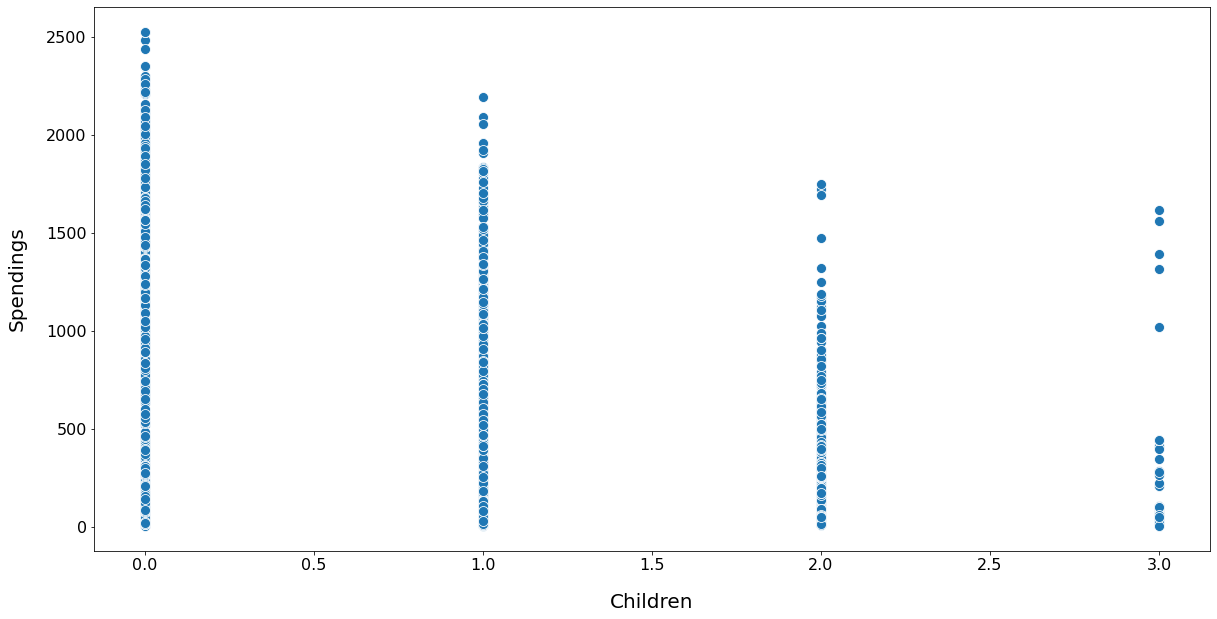

In [33]:
#children vs spendings
plt.figure(figsize=(20,10))
sns.scatterplot(x=data.Children, y=data.TotalSpendings, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Children', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

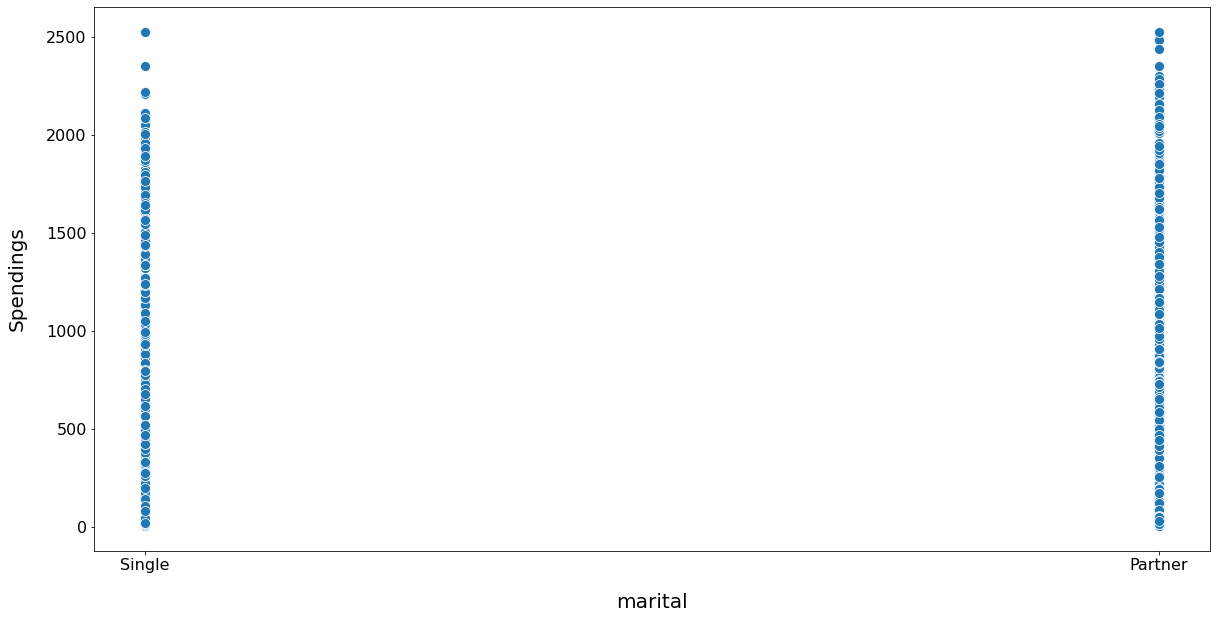

In [34]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=data.Marital_Status, y=data.TotalSpendings, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('marital', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

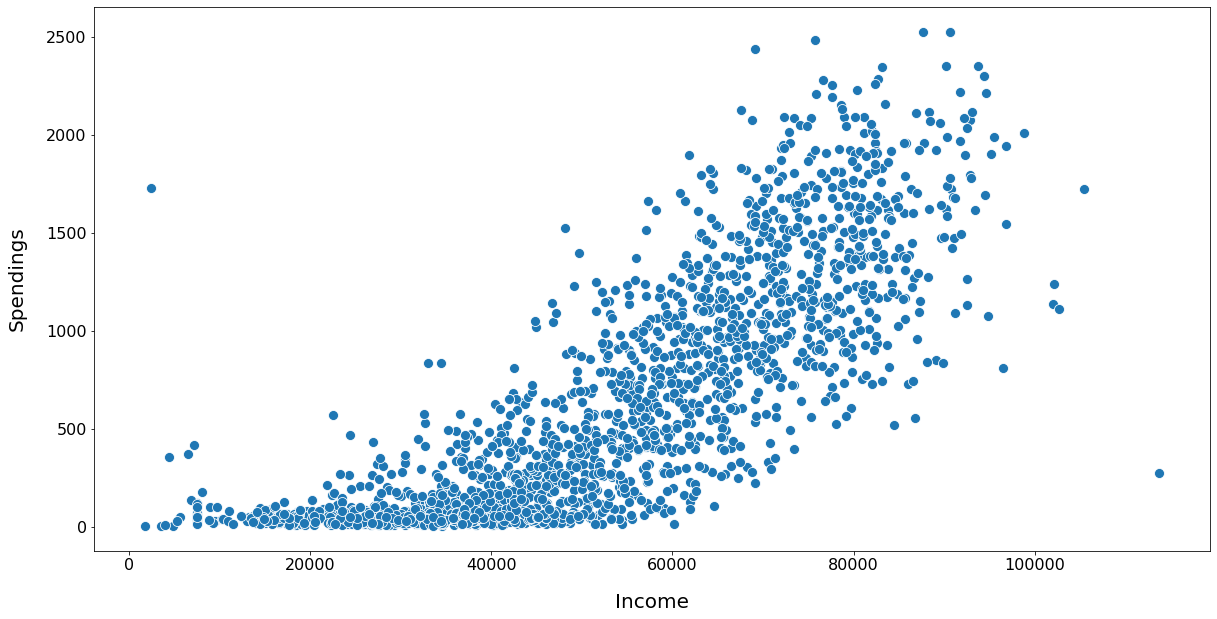

In [35]:
plt.figure(figsize=(20,10))


sns.scatterplot(x=data.Income, y=data.TotalSpendings, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);


In [53]:
X = data.drop(['ID','Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer', 'Z_CostContact',
                          'Z_Revenue', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response','Agegroup', 'Children'], axis=1)
X

,Income,Age,TotalSpendings
0,58138.0,58,1617
1,46344.0,61,27
2,71613.0,50,776
3,26646.0,31,53
4,58293.0,34,422
...,...,...,...
2235,61223.0,48,1341
2236,64014.0,69,444
2237,56981.0,34,1241
2238,69245.0,59,843


elbow method활용을 통한 optimal k 찾기

Text(0.42, 0.97, 'Elbow')

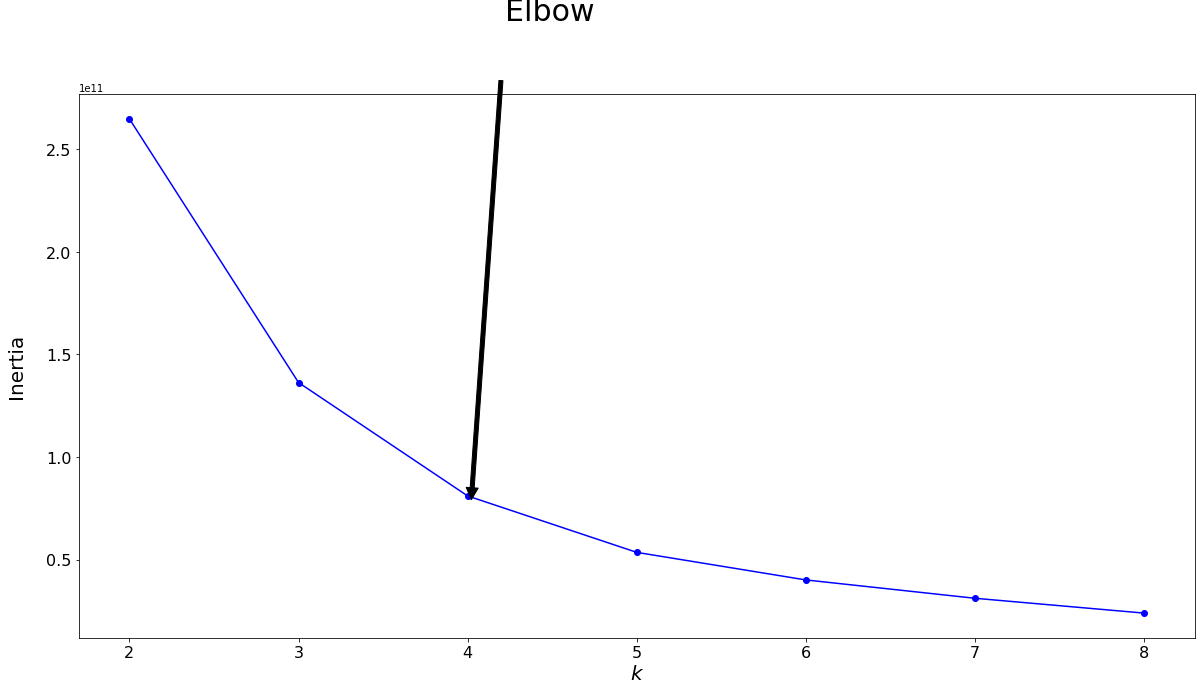

In [54]:
from sklearn.cluster import KMeans
options = range(2,9)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(20,10))    
plt.plot(options, inertias, 'bo-')
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel("$k$", fontsize=20)
plt.ylabel('Inertia', fontsize=20, labelpad=20);
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.42, 0.97),
             textcoords='figure fraction',
             fontsize=30,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )

In [55]:
Kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X)
X_preds = Kmeans.predict(X)

data_kmeans = data.copy()
data_kmeans['clusters'] = X_preds
data_kmeans

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalSpendings,Children,Agegroup,clusters
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,3,11,1,58,1617,0,Middle Age,2
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,3,11,0,61,27,2,Middle Age,3
2,4141,1965,Graduation,Partner,71613.0,0,0,21-08-2013,26,426,...,0,0,3,11,0,50,776,0,Middle Age,1
3,6182,1984,Graduation,Partner,26646.0,1,0,10-02-2014,26,11,...,0,0,3,11,0,31,53,1,Adult,0
4,5324,1981,PhD,Partner,58293.0,1,0,19-01-2014,94,173,...,0,0,3,11,0,34,422,1,Adult,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Partner,61223.0,0,1,13-06-2013,46,709,...,0,0,3,11,0,48,1341,1,Middle Age,2
2236,4001,1946,PhD,Partner,64014.0,2,1,10-06-2014,56,406,...,0,0,3,11,0,69,444,3,Senior,2
2237,7270,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,...,0,0,3,11,0,34,1241,0,Adult,2
2238,8235,1956,Master,Partner,69245.0,0,1,24-01-2014,8,428,...,0,0,3,11,0,59,843,1,Middle Age,2


In [ ]:
cluster_counts = data_kmeans.clusters.value_counts()

fig = px.pie(cluster_counts, 
             values = cluster_counts.values, 
             names = cluster_counts.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

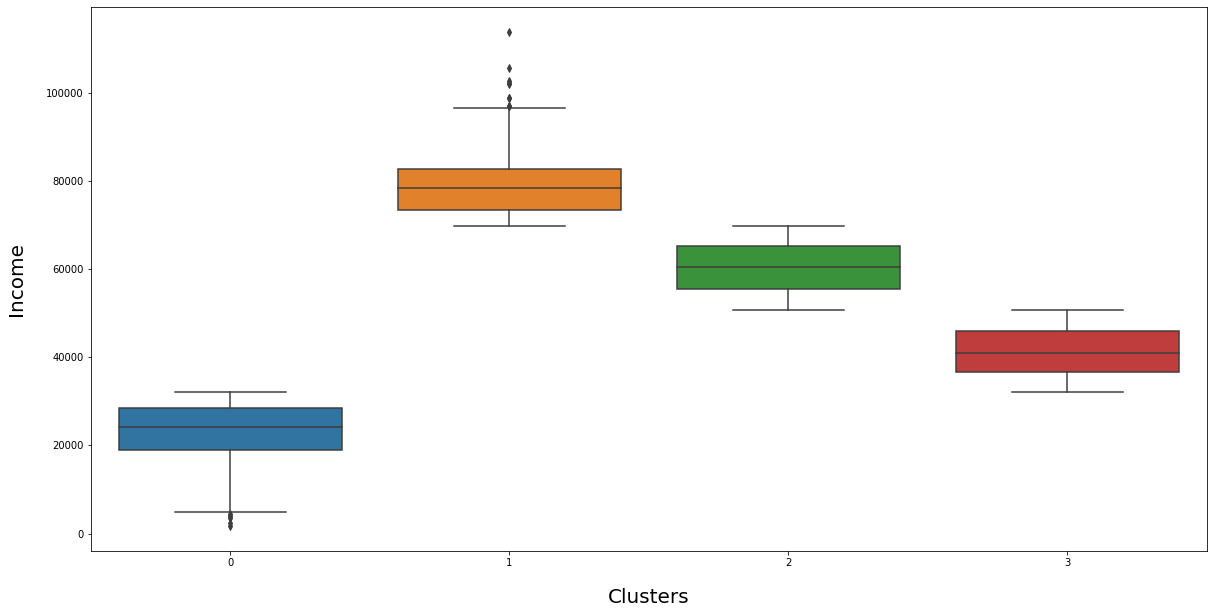

In [ ]:
plt.figure(figsize=(20,10))

sns.boxplot(data=data_kmeans, x='clusters', y = 'Income')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=20, labelpad=20);

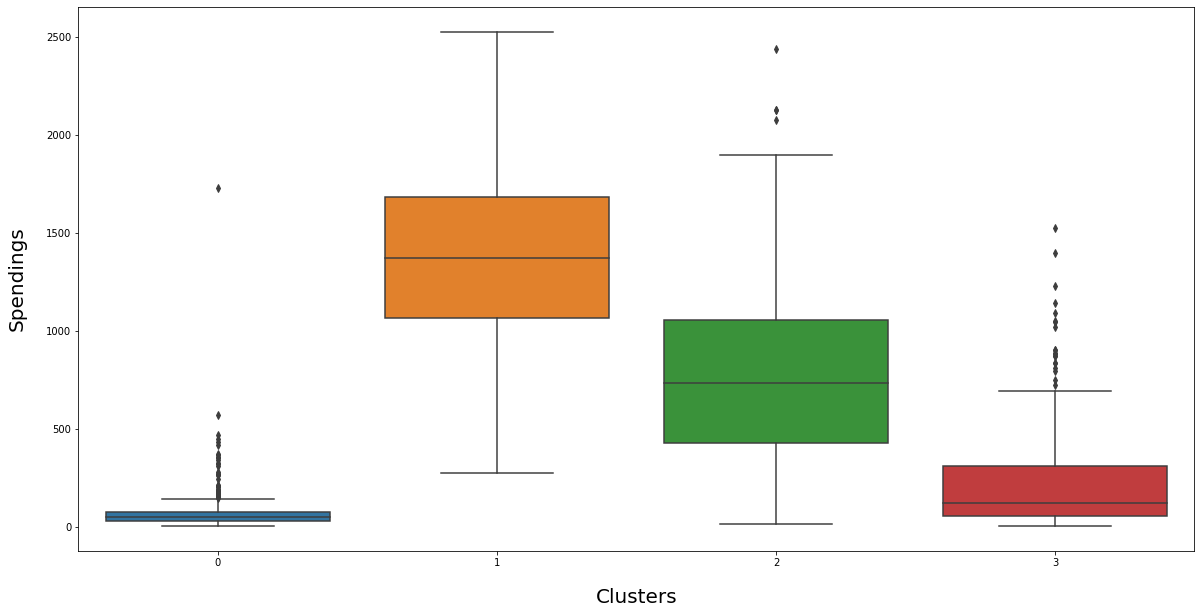

In [ ]:
plt.figure(figsize=(20,10))

sns.boxplot(data=data_kmeans, x='clusters', y='TotalSpendings')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

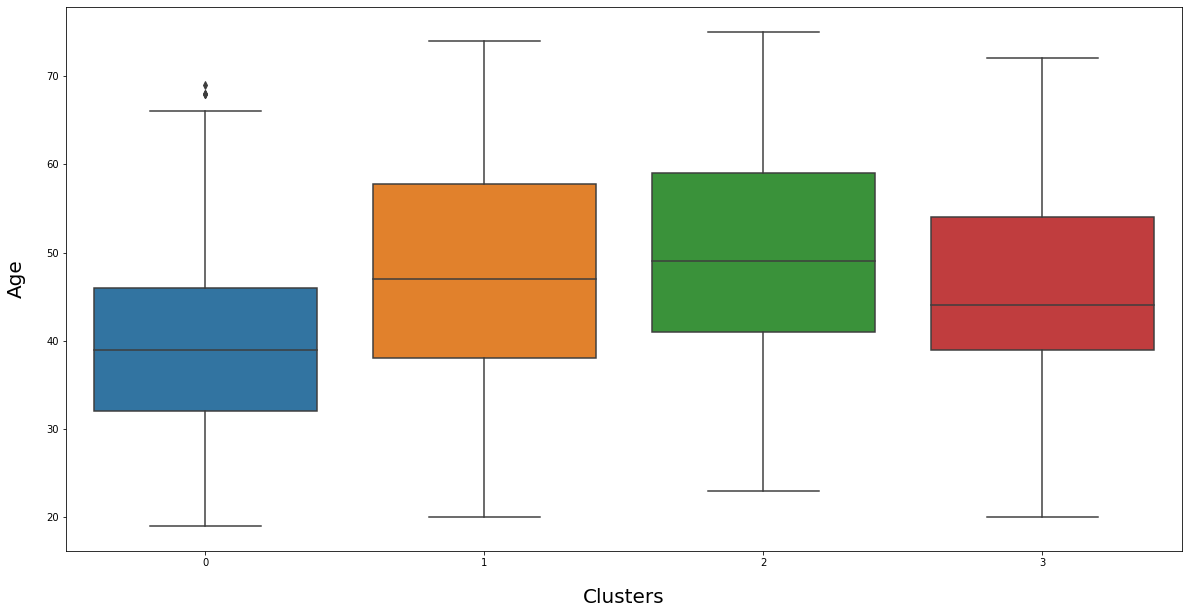

In [ ]:
plt.figure(figsize=(20,10))

sns.boxplot(data=data_kmeans, x='clusters', y = 'Age');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Age', fontsize=20, labelpad=20);

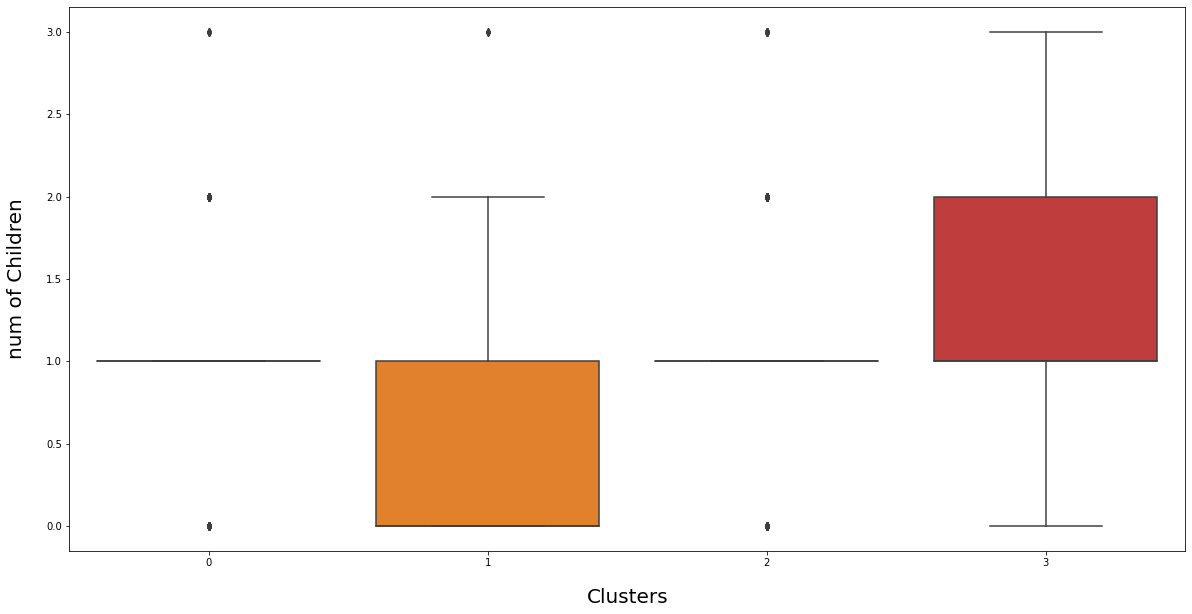

In [ ]:
plt.figure(figsize=(20,10))

sns.boxplot(data=data_kmeans, x='clusters', y = 'Children');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('num of Children', fontsize=20, labelpad=20);

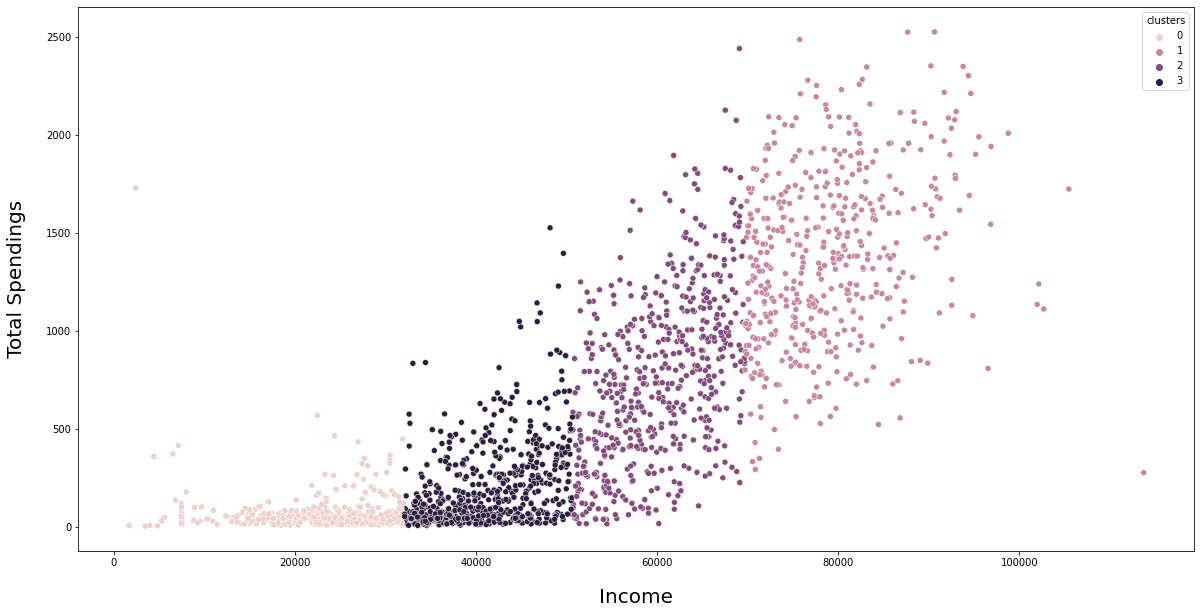

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data_kmeans, x='Income', y='TotalSpendings', hue='clusters');
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20);



Clusters별 구매 행동 유사성 파악하기

<Figure size 2160x1080 with 0 Axes>

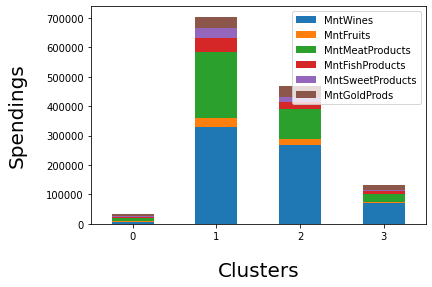

In [ ]:
cluster_spendings = data_kmeans.groupby('clusters')[['MntWines', 'MntFruits','MntMeatProducts', 
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

plt.figure(figsize=(30,15))
cluster_spendings.plot(kind='bar',stacked=True)
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

<Figure size 2160x1080 with 0 Axes>

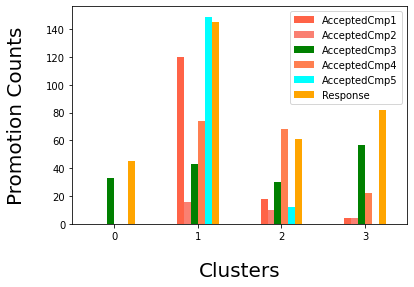

In [ ]:
cluster_campaign = data_kmeans.groupby('clusters')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                                  'AcceptedCmp5', 'Response']].sum()

plt.figure(figsize=(30,15))
cluster_campaign.plot(kind='bar', color=['tomato', 'salmon', 'green', 'coral', 'cyan', 'orange'])


plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Promotion Counts', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');